In [1]:
import os
import pandas as pd
# import glob2 as glob
from root_numpy import root2array 
# root_file = "./delphes_nolhe_SV_rinv_03.root"
root_file = "./SVJ_pythia/Z1500/delphes_nolhe_Z1500_rinv_03.root"
# root_file = "./delphes_nolhe_Alan.root"
# root_file = "./delphes_nolhe_papper.root"
# root_file = "./delphes_nolhe_SVJ_Z1500_rinv_03.root"


event = root2array(root_file, "Delphes;1", branches=[
"Particle.Status", "Particle.M1", "Particle.M2", "Particle.D1", "Particle.D2",
"Particle.PID", "Particle.PT",
"Particle.Eta","Particle.Phi", "Particle.Mass"], start=0, stop=1, step=None)

# jet = root2array(root_file, "Delphes;1", branches=["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"], start=1, stop=10000, step=None)
# for i in range(len(jet)):
#     for j in range(len(jet[i][0])):
#         print(i, j, jet[i][0][j])
# d1, d2 = -1, -1
# for j in  range(len(event[0][0])):
#     if(event[0][5][j]==4900101)&(event[0][0][j]==23): #23 : hardest outgoing particles
#         print(j,  event[0][0][j],  event[0][1][j], event[0][2][j], event[0][3][j], event[0][4][j], event[0][5][j], event[0][6][j], event[0][7][j] ,event[0][8][j], event[0][9][j]) 
#         d1, d2 = -1, -1
#         while(event[0][3][j]== event[0][4][j]):
#             print("check")
#             d1 = event[0][3][j]
#             d2 = event[0][4][j]
            
#         print("\tDaughter:", event[0][3][d1], event[0][4][d1])
# #         d1, d2 = event[0][3][j], event[0][4][j]
#         print("\tDaughter_id:", event[0][5][d1], event[0][5][d2], "\n")
        

 
 

Welcome to JupyROOT 6.20/04


In [11]:
def find_decayratio(event,n, mode = 'daughter'):
    d1, d2 = -1, -1
    d0 = -1
    ID = 4900101
    for j in  range(len(event[n][0])):
        if(event[n][5][j]==ID)&(event[n][0][j]==23): #23 : hardest outgoing particles
#             print(j,  event[n][0][j],  event[0][1][j], event[n][2][j], event[n][3][j], event[n][4][j], event[n][5][j], event[n][6][j], event[n][7][j] ,event[n][8][j], event[n][9][j]) 
            d1 = event[n][3][j]
            d2 = event[n][4][j]
            while((event[n][5][d1]==ID)or(event[n][5][d2]==ID) ):
                if(event[n][5][d1]==ID):
                    d0 = d1
                    d1 = event[n][3][d0]
                    d2 = event[n][4][d0]
                    if(event[n][5][d2]==ID):
                        d0 = d2
                        d1 = event[n][3][d0]
                        d2 = event[n][4][d0]
                        
#             print("\tDaughter:", event[n][3][d0], event[n][4][d0])
#             d1, d2 = event[n][3][j], event[n][4][j]
#             print("\tDaughter_id:", event[n][5][d1], event[n][5][d2], "\n")
    if mode=='daughter':
        return d1, d2
    if mode=='id':
        return event[n][5][d1], event[n][5][d2]
#             print("\tDaughter_status:", event[n][0][d1], event[n][0][d2], "\n")
#             m1, m2 =  event[n][1][d1],  event[n][2][d1]
#             print("\tDaughter1_motherid:", event[n][5][m1], event[n][5][m2], "\n")
#             m1, m2 =  event[n][1][d2],  event[n][2][d2]
#             print("\tDaughter2_motherid:", event[n][5][m1], event[n][5][m2], "\n")
        
        

In [12]:
n=0
ID=4900113
N = []
for j in  range(len(event[n][0])):
    if(event[n][5][j]==ID): #23 : hardest outgoing particles
        print("Self",j)
        m1 = event[n][1][j]
        m2 = event[n][2][j]
        print("Mother:",m1,m2)
        if (m1==m2):
            print("Mother_id:", event[n][5][m1], "nan\n")
        else:
            print("Mother_id:", event[n][5][m1], event[n][5][m2],"\n")
        d1 = event[n][3][j]
        d2 = event[n][4][j]
        prevent = 0
        while(d1==d2): 
            d0 = d1
            if(d1==-1):
                print("stable particles\n\n")
                break
            if(prevent >= 100):
                print("infinite loop!")
                prevent=0
                break
            d1 = event[n][3][d1]
            d2 = event[n][4][d2]
            if(d1!=d2):
                N.append(d0)
            prevent= prevent+1
        if(d1!=-1):
            print("Daughter", d1, d2)
            print("Daughter_id", event[n][5][d1], event[n][5][d2])
            m1, m2 = event[n][1][d1], event[n][2][d1]
            print("Daughter1_parents", m1, m2)
            if(m1==m2):
                print("Daughter1_parents_id", event[n][5][m1], "nan") 
            else:
                print("Daughter1_parents_id", event[n][5][m1], event[n][5][m2])
            m1, m2 = event[n][1][d2], event[n][2][d2]
            print("Daughter2_parents", m1, m2)
            if(m1==m2): 
                print("Daughter2_parents_id", event[n][5][m1], "nan","\n")
            else:
                print("Daughter2_parents_id", event[n][5][m1], event[n][5][m2],"\n")

Self 636
Mother: 594 635
Mother_id: 4900101 -4900101 

Daughter 1034 1035
Daughter_id -3 3
Daughter1_parents 636 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 636 -1
Daughter2_parents_id 4900113 -211 

Self 637
Mother: 594 635
Mother_id: 4900101 -4900101 

Daughter 1048 1049
Daughter_id -5 5
Daughter1_parents 637 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 637 -1
Daughter2_parents_id 4900113 -211 

Self 646
Mother: 594 635
Mother_id: 4900101 -4900101 

Daughter 1084 1085
Daughter_id -4 4
Daughter1_parents 646 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 646 -1
Daughter2_parents_id 4900113 -211 

Self 648
Mother: 594 635
Mother_id: 4900101 -4900101 

Daughter 1098 1099
Daughter_id -5 5
Daughter1_parents 648 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 648 -1
Daughter2_parents_id 4900113 -211 

Self 651
Mother: 594 635
Mother_id: 4900101 -4900101 

Daughter 1120 1121
Daughter_id 4900213 -4900213
Daughter1_parents 651 -1
Daughter1_parents_id 4900113

In [5]:
for j in range(len(event[0][0])):  
    print(j,  event[0][0][j],  event[0][1][j], event[0][2][j], event[0][3][j], event[0][4][j], event[0][5][j], event[0][6][j], event[0][7][j] ,event[0][8][j], event[0][9][j]) 
 

0 4 -1 -1 259 -1 2212 0.0 999.9000244140625 0.0 0.9382699728012085
1 4 -1 -1 260 -1 2212 0.0 -999.9000244140625 0.0 0.9382699728012085
2 21 5 5 4 -1 2 0.0 999.9000244140625 0.0 0.0
3 21 6 -1 4 -1 -2 0.0 -999.9000244140625 0.0 0.0
4 22 2 3 7 7 5000001 0.0 -999.9000244140625 0.0 1506.89990234375
5 42 9 -1 2 2 2 4.766465474810404e-14 999.9000244140625 -0.46364760398864746 0.0
6 41 10 10 8 3 -2 5.728578689970926e-14 -999.9000244140625 2.6224465370178223 0.0
7 44 4 4 11 11 5000001 101.65792846679688 -2.9050285816192627 -0.47478869557380676 1506.89990234375
8 43 6 -1 12 12 21 101.65792846679688 -0.15822364389896393 2.6668038368225098 0.0
9 41 14 14 13 5 2 7.105427357601002e-15 999.9000244140625 1.5707963705062866 0.0
10 42 15 -1 6 6 -2 3.972054703514161e-15 -999.9000244140625 -2.677945137023926 0.0
11 44 7 7 16 16 5000001 129.13214111328125 -2.6326186656951904 -0.15796419978141785 1506.89990234375
12 44 8 8 17 17 21 99.58393859863281 -0.11727285385131836 2.6253397464752197 0.0
13 43 9 -1 18 

In [3]:
def find_subdecayratio(event, n, j, ID=4900111): 
    d1, d2 = -1, -1
    d0 = -1
    d1 = event[n][3][j]
    d2 = event[n][4][j]
    g = set([1,2,3,4,5])
    if((abs(event[n][5][d1])!=ID)&(abs(event[n][5][d2])!=ID)):
        d1=0
        d2=0
        return d1, d2
    else:
        while((abs(event[n][5][d1])==ID)or(abs(event[n][5][d2])==ID) ):
            if(abs(event[n][5][d1])==ID):
                d0 = d1
                d1 = event[n][3][d0]
                d2 = event[n][4][d0]
            if(abs(event[n][5][d2])==ID):
                d0 = d2
                d1 = event[n][3][d0]
                d2 = event[n][4][d0]
        return event[n][5][d1], event[n][5][d2]
def find_daughterid(event, n, j, ID=4900111):
    sid = event[n][5][j]
    if(sid!=ID):
        return 0, 0
    else:
        d1 = event[n][3][j]
        d2 = event[n][4][j]
        return event[n][5][d1], event[n][5][d2]

In [5]:
a113 = []
a111 = []
for n in range(1000):
    a1, a2 = find_decayratio(event,n)
    d1a1 = find_daughterid(event, n, a1, ID=4900111)
    d1a2 = find_daughterid(event, n, a1, ID=4900113)
    d2a1 = find_daughterid(event, n, a2, ID=4900111)
    d2a2 = find_daughterid(event, n, a2, ID=4900113)
    
#     d1a1 = find_subdecayratio(event, n, a1, ID=4900211)
#     d1a2 = find_subdecayratio(event, n, a1, ID=4900213)
#     d2a1 = find_subdecayratio(event, n, a2, ID=4900211)
#     d2a2 = find_subdecayratio(event, n, a2, ID=4900213)
    a111.append(d1a1)
    a113.append(d1a2)
    a111.append(d2a1)
    a113.append(d2a2)

In [154]:
i=6
a1, a2 = find_decayratio(event,i)
d1 = event[i][3][a1]
event[i][5][d1]

-2

In [6]:
r = [sum([1 for i in a111 for j in i if(j!=0)]),sum([1 for i in a113 for j in i if(j!=0)])]
r[0]/(sum(r)), r[1]/(sum(r))

(0.2455968688845401, 0.7544031311154599)

In [7]:
[sum([1 for i in a113 for j in i if j!=0])/(sum([1 for i in a113 for j in i if j!=0])+sum([1 for i in a111 for j in i if j!=0])),
sum([1 for i in a113 for j in i if j!=0]),sum([1 for i in a111 for j in i if j!=0])]

[0.7544031311154599, 1542, 502]

In [173]:
r = [sum([1 for i in a113 for j in i if (abs(j)== 4900213)]), sum([1 for i in a113 for j in i if (abs(j)!= 4900213)&(j!=0)])]
r

[9056, 20982]

In [8]:
r[0]/sum(r)

0.2455968688845401

In [9]:
r = [sum([1 for i in a111 for j in i if (abs(j)== 4900211)]), sum([1 for i in a111 for j in i if (abs(j)!= 4900211)&(j!=0)])]
r[0]/sum(r)

0.3107569721115538

In [11]:
a = a111+a113
r = [sum([1 for i in a for j in i if (abs(j)== 4900211)or(abs(j)== 4900213)]),sum([1 for i in a for j in i if (abs(j)!= 4900211)&(abs(j)!= 4900213)&(j!=0)])]
r

[630, 1414]

In [12]:
r[0]/sum(r) # that is rinv == 0.3 !!!

0.3082191780821918

In [182]:
r = [sum([1 for i in a for j in i if (abs(j)== 4900211)]), sum([1 for i in a for j in i if (abs(j)== 4900213)])]
r 

[2916, 9056]

In [183]:
r[0]/sum(r)    

0.24356832609421986

# Jet matching

In [34]:
def Event_n(i, less=True):
    root_file = "./SVJ_pythia/Z1500/delphes_nolhe_Z1500_rinv_03.root"
    # root_file = "./delphes_nolhe_Alan.root"
    # root_file = "./delphes_nolhe_papper.root"
    # root_file = "./delphes_nolhe_SVJ_Z1500_rinv_03.root"
    if less:
        event = root2array(root_file, "Delphes;1", branches=[
            "Particle.Status", "Particle.PID", "Particle.PT",
            "Particle.Eta","Particle.Phi", "Particle.Mass"], start=i, stop=i+1, step=None)
    else:
        event = root2array(root_file, "Delphes;1", branches=[
            "Particle.Status", "Particle.M1", "Particle.M2", "Particle.D1", "Particle.D2",
            "Particle.PID", "Particle.PT",
            "Particle.Eta","Particle.Phi", "Particle.Mass"], start=i, stop=i+1, step=None)
    return event
def Jet_n(i):
    root_file = "./SVJ_pythia/Z1500/delphes_nolhe_Z1500_rinv_03.root"
    jet = root2array(root_file, "Delphes;1", branches=["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"], start=i, stop=i+1, step=None)
    return(jet)
    
    

In [43]:
def find_decayratio(event,n=0, mode = 'daughter'):
#     d1, d2 = -1, -1
    d0 = -1
    ID = 4900101
    for j in  range(len(event[n][0])):
        if(event[n][5][j]==ID)&(event[n][0][j]==23): #23 : hardest outgoing particles
#             print(j,  event[n][0][j],  event[0][1][j], event[n][2][j], event[n][3][j], event[n][4][j], event[n][5][j], event[n][6][j], event[n][7][j] ,event[n][8][j], event[n][9][j]) 
            d1 = event[n][3][j]
            d2 = event[n][4][j]
            while((event[n][5][d1]==ID)or(event[n][5][d2]==ID) ):
                if(event[n][5][d1]==ID):
                    d0 = d1
                    d1 = event[n][3][d0]
                    d2 = event[n][4][d0]
                else:
                    if(event[n][5][d2]==ID):
                        d0 = d2
                        d1 = event[n][3][d0]
                        d2 = event[n][4][d0]
            if mode=='daughter':
                return d1, d2
            if mode=='id':
                return event[n][5][d1], event[n][5][d2]
            break
def find_subdecayratio(event, j, n=0, ID=4900111): 
    d0 = -1
    d1 = event[n][3][j]
    d2 = event[n][4][j]
    g = set([1,2,3,4,5])
    if((abs(event[n][5][d1])!=ID)&(abs(event[n][5][d2])!=ID)):
        d1=0
        d2=0
        return d1, d2
    else:
        while((abs(event[n][5][d1])==ID)or(abs(event[n][5][d2])==ID) ):
            if(abs(event[n][5][d1])==ID):
                d0 = d1
                d1 = event[n][3][d0]
                d2 = event[n][4][d0]
            if(abs(event[n][5][d2])==ID):
                d0 = d2
                d1 = event[n][3][d0]
                d2 = event[n][4][d0]
        return event[n][5][d1], event[n][5][d2]
def find_daughterid(event, j, n=0, ID=4900111):
    sid = event[n][5][j]
    if(sid!=ID):
        return 0, 0
    else:
        d1 = event[n][3][j]
        d2 = event[n][4][j]
        return event[n][5][d1], event[n][5][d2]

In [67]:
Opat = []
for n in range(20000):
    event = Event_n(n)
    if n%100==0:
        print([[event[0][j][i] for j in range((len(event[0])))] for i in range(len(event[0][0])) if event[0][0][i] == 23])
    Opat.append([[event[0][j][i] for j in range(len(event[0]))] for i in range(len(event[0][0])) if event[0][0][i] == 23])

    del event


[[23, 2, 3, 8, 8, 4900101, 416.9078063964844, 1.178186297416687, 0.7011452317237854], [23, 2, 3, 6, 7, -4900101, 416.9078063964844, -1.4653711318969727, -2.4404473304748535]]
[[23, 2, 3, 12, 12, 4900101, 57.359230041503906, 0.46354126930236816, 2.2398736476898193], [23, 2, 3, 10, 11, -4900101, 57.359230041503906, 0.2934344410896301, -0.9017189145088196]]
[[23, 2, 3, 6, 7, 4900101, 694.6964721679688, 0.4651508927345276, -0.046278953552246094], [23, 2, 3, 8, 8, -4900101, 694.6964721679688, -1.3248504400253296, 3.095313787460327]]
[[23, 2, 3, 8, 8, 4900101, 513.1603393554688, -0.12385562807321548, -1.9882615804672241], [23, 2, 3, 6, 7, -4900101, 513.1603393554688, 1.0158390998840332, 1.1533310413360596]]
[[23, 2, 3, 6, 7, 4900101, 232.4949188232422, -1.2828996181488037, 2.3813178539276123], [23, 2, 3, 8, 8, -4900101, 232.4949188232422, 1.2569630146026611, -0.7602748274803162]]
[[23, 2, 3, 6, 7, 4900101, 336.15350341796875, -0.32964763045310974, -1.6781425476074219], [23, 2, 3, 8, 8, -4900

In [86]:
def deltaPhi(phi1,phi2):
    x = phi1-phi2
    while x>= np.pi: x -= np.pi*2.
    while x< -np.pi: x += np.pi*2.
    return x

def deltaR(eta1,phi1,eta2,phi2):
    return (deltaPhi(phi1,phi2)**2+(eta1-eta2)**2)**0.5
    
    
def Match(jet, event, dR, _pid=1, _pT=2, _eta=3, _phi=4, _m=5, R = 0.5):
    return (dR > deltaR(jet[1][0],jet[2][0],event[_eta],event[_phi]))
def Match_dR(jet, event, _pid=5, _pT=6, _eta=7, _phi=8, _m=9, R = 0.5):
    return deltaR(jet[1][0],jet[2][0],event[_eta],event[_phi])
    

In [71]:
np.save("./Opat_rinv_03",Opat)

/usr/local/lib64/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [69]:
root_file = "./SVJ_pythia/Z1500/delphes_nolhe_Z1500_rinv_03.root"
jet = root2array(root_file, "Delphes;1", branches=["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"], start=0, stop=20000, step=None)

In [89]:
jet[i]

(array([416.70370483]), array([0.72132856]), array([0.53485656]), array([49.61766052]))

In [103]:
parton_pT = []
jet_pT = []
for i in range(len(jet)):
    dR = 999
    ppT = -1
    if len(jet[i][0])<1:
        continue
    for j in range(len(Opat[i])):
        if Match(jet[i], Opat[i][j], dR):
            dR = Match_dR(jet[i], Opat[i][j])
            ppT = Opat[i][j][6]
            jpt = jet[i][0][0]
    parton_pT.append(ppT)
    jet_pT.append(jpt)
        
    

(array([5.490e+03, 1.311e+03, 2.550e+02, 1.060e+02, 5.900e+01, 3.800e+01,
        1.700e+01, 1.200e+01, 8.000e+00, 7.000e+00, 6.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

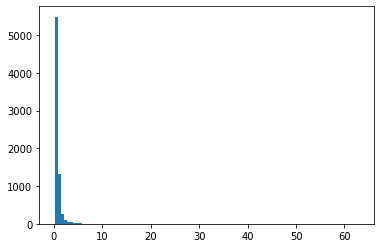

In [104]:
plt.hist([jet_pT[i]/parton_pT[i] for i in range(len(jet_pT))] , bins=100)

In [58]:
[event[0][5][i] for i in range(len(event[0][0])) if event[0][0][i] == 23]

[4900101, -4900101]

## Plot

In [96]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd
# import glob2 as glob
from root_numpy import root2array 

In [6]:
def mass_inv(jet):
#    ["FatJet.PT", "FatJet.Eta", "FatJet.Phi", "FatJet.Mass"] 
# formula https://en.wikipedia.org/wiki/Invariant_mass#As_defined_in_particle_physics
    M_inv = 2*jet[0][0]*jet[0][1]*(np.cosh(jet[1][0]-jet[1][1])-np.cos(jet[2][0]-jet[2][1]))
    return M_inv**0.5
    
    

In [7]:
# root_file = "./delphes_nolhe_Z1000_rinv_03.root"
root_file = "./SVJ_pythia/Z1500/delphes_nolhe_Z1500_rinv_03.root"
# root_file = "./SVJ_pythia/delphes_nolhe_Z1000_rinv_03.root"
# jet = root2array(root_file, "Delphes;1", branches=["FatJet.PT", "FatJet.Eta", "FatJet.Phi", "FatJet.Mass"], start=1, stop=10000, step=None)
jet = root2array(root_file, "Delphes;1", branches=["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"], start=0, stop=20000, step=None)
W =  root2array(root_file, "Delphes;1", branches=["Event.Weight"], start=0, stop=20000, step=None)
# print(i, j, jet[i][0][j])

root_file2 = "./SVJ_pythia/Z1500/delphes_nolhe_Z1500_rinv_0.root"
# jet2 = root2array(root_file2, "Delphes;1", branches=["FatJet.PT", "FatJet.Eta", "FatJet.Phi", "FatJet.Mass"], start=1, stop=10000, step=None)
jet2 = root2array(root_file2, "Delphes;1", branches=["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"], start=0, stop=20000, step=None)
W2 =  root2array(root_file2, "Delphes;1", branches=["Event.Weight"], start=0, stop=20000, step=None)
W = [i[0][0] for i in W]
W2 = [i[0][0] for i in W2]

Warning in <TClass::Init>: no dictionary for class HepMCEvent is available
Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class LHEFEvent is available
Warning in <TClass::Init>: no dictionary for class LHEFWeight is available
Warning in <TClass::Init>: no dictionary for class GenParticle is available
Warning in <TClass::Init>: no dictionary for class SortableObject is available
Warning in <TClass::Init>: no dictionary for class Track is available
Warning in <TClass::Init>: no dictionary for class Tower is available
Warning in <TClass::Init>: no dictionary for class Jet is available
Warning in <TClass::Init>: no dictionary for class MissingET is available
Warning in <TClass::Init>: no dictionary for class Electron is available
Warning in <TClass::Init>: no dictionary for class Photon is available
Warning in <TClass::Init>: no dictionary for class Muon is available
Warning in <TClass::Init>: no dictionary for class Scala

In [46]:
len(W[:][1])

147

In [8]:
m_inv = []
Wc = []
for i in range(len(jet)):
    if jet[i][0].shape[0]<2:
        continue
    if jet[i][0][0]<440:
        continue
    if jet[i][0][1]<60:
        continue
    if abs(jet[i][1][0]-jet[i][1][1])>=1.2:
        continue
    m_inv.append(mass_inv(jet[i]))
    Wc.append(W[i])
    
m_inv2 = []
Wc2 = []
for i in range(len(jet2)):
    if jet2[i][0].shape[0]<2:
        continue
    if jet2[i][0][0]<440:
        continue
    if jet2[i][0][1]<60:
        continue
    if abs(jet2[i][1][0]-jet2[i][1][1])>=1.2:
        continue
    m_inv2.append(mass_inv(jet2[i]))
    Wc2.append(W2[i])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


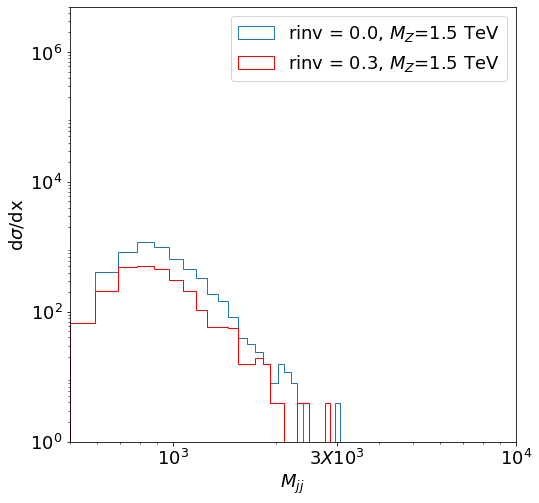

In [9]:

bins = 100
fs=18 # front size
tagsize = 18 # label tag size ((\blue block) W \n (\orange block) QCD )
plt.figure(figsize=(8,8)) # plotsize
x1, x2 = 500, 10000

bisize = np.linspace(500,10000,101)



# plt.hist(m_inv ,bins=bisize, histtype='step',
#          label="00000")

plt.hist(m_inv2 ,bins=bins, histtype='step',  range=[x1, x2], weights= np.array(Wc2),
         label='rinv = 0.0, ${M_{Z}}$=1.5 TeV')
plt.hist(m_inv ,bins=bins, histtype='step', color='r', range=[x1, x2], weights= np.array(Wc),
         label='rinv = 0.3, ${M_{Z}}$=1.5 TeV')

# plt.hist(mT ,bins=bins, histtype='step',  range=[x1, x2], label='${M_{T}}$ mean: %f' %np.average(mT))
  
plt.legend(prop={'size': tagsize}) # plot label tag
plt.yscale('log')
plt.xscale('log')
plt.xlabel('${M_{jj}}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("d${\sigma}$/dx", fontsize=fs)  # plot y-axis label $\u03C3^{-1}$
plt.ylim((0,5000000))
plt.xlim((x1,x2))
plt.xticks([1000,3000,10000], ['${10^3}$', '3${X}$${10^{3}}$','${10^{4}}$' ],fontsize=fs)   # set x-ticks size
plt.yticks([1,100,10000,1000000],fontsize=fs)   # set y-ticks size 
# plt.savefig("./invariant_mass_JET_SVJ_Z1500.png")  #save figure as png  
plt.show() 

# Calculate 

In [85]:
Nc = 2
Nf = 2
b = 11/3*Nc-2/3*Nf
lamdas = 10
alphad =2*np.pi/(b*np.log(1000/lamdas))
alphad

0.22739605897364018

In [20]:
m_inv = []
Wc = []
for i in range(len(jet)):
    if jet[i][0].shape[0]<2:
        continue
    if jet[i][0][0]<440:
        continue
    if jet[i][0][1]<60:
        continue
#     if abs(jet[i][1][0]-jet[i][1][1])>=1.2:
#         continue
    m_inv.append(mass_inv(jet[i]))
    Wc.append(W[i])

In [26]:
N_events = 1000
Xection = np.sum(W)/20000
Lumi = 37
expected_yield = (Xection)*Lumi*1000
expected_yield

145548.1116771698

In [27]:
Xection

3.933732748031616

In [1]:
##======================Madgrah default Qcut calculated by xqcut ======================================
xqcut = 100 ##in 1707.05632 default
Qcut = max(1.4 * xqcut, xqcut+10)
Qcut

140.0

In [72]:
##======================= change Pythia cmnd========================
rinv = 0.0
mass = 20
lambdas = 1
n=6
print("HiddenValley:Ngauge  =2")
print("HiddenValley:Lambda = "+str(lambdas))
print("HiddenValley:alphaFSR = "+ str(lambdas))
print("HiddenValley:spinFv = 0")
print("HiddenValley:FSR = on")
print("HiddenValley:fragment = on")
print("4900101:m0 = "+str(mass / 2))
print("4900101:mWidth = "+ str(mass / 100))
print("4900101:mMin = "+str(mass / 2 - mass / 100))
print("4900101:mMax = "+str(mass / 2 + mass / 100))
print("4900111:m0 = "+str(mass))
print("4900113:m0 = "+ str(mass))
print("4900211:m0 = "+ str(mass / 2.0 - 0.01))
print("4900213:m0 = "+ str(mass / 2.0 - 0.01))
print("HiddenValley:pTminFSR = "+ str(1.1 * lambdas))
print("4900111:onechannel = 1 " +str(1.0 - rinv) +" 91 -3 3")
print("4900111:addchannel = 1 " +str(rinv) +" 0 4900211 -4900211")
print("4900113:onechannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -1 1")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -2 2")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -3 3")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -4 4")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -5 5")
print("4900113:addchannel = 1 " +str(rinv) +" 0 4900213 -4900213")
print("HiddenValley:probVector = ", 0.75)

HiddenValley:Ngauge  =2
HiddenValley:Lambda = 1
HiddenValley:alphaFSR = 1
HiddenValley:spinFv = 0
HiddenValley:FSR = on
HiddenValley:fragment = on
4900101:m0 = 10.0
4900101:mWidth = 0.2
4900101:mMin = 9.8
4900101:mMax = 10.2
4900111:m0 = 20
4900113:m0 = 20
4900211:m0 = 9.99
4900213:m0 = 9.99
HiddenValley:pTminFSR = 1.1
4900111:onechannel = 1 1.0 91 -3 3
4900111:addchannel = 1 0.0 0 4900211 -4900211
4900113:onechannel = 1 0.2 91 -1 1
4900113:addchannel = 1 0.2 91 -2 2
4900113:addchannel = 1 0.2 91 -3 3
4900113:addchannel = 1 0.2 91 -4 4
4900113:addchannel = 1 0.2 91 -5 5
4900113:addchannel = 1 0.0 0 4900213 -4900213
HiddenValley:probVector =  0.75


In [2]:
##======================= setting in paper ========================
rinv = 0.4
mass = 20 
# lambdas = mass/2 
lambdas = 1
xqcut = 100 ##in 1707.05632 default in Madgraph
Qcut = max(1.4 * xqcut, xqcut+10) #setting in Pythia8
R = 0.5 
etaj = 2.5
nj = 2
n=6

##----------------------------------- Jet Matching-------------------------

# print("JetMatching:merge = on")
# print("JetMatching:scheme = 1")
# print("JetMatching:setMad = on")
# print("JetMatching:qCut = "+str(Qcut))
# print("JetMatching:coneRadius = "+str(R))
# print("JetMatching:etaJetMax = "+str(etaj))
# print("JetMatching:nJetMax = "+str(nj))
##------------------------------------ Hidden Valley setting-----------------
print("! Hidden Valley")
print("HiddenValley:Ngauge =2")
print("HiddenValley:nFlav =2")
print("HiddenValley:alphaOrder =0") #runing the alpha_d
print("HiddenValley:Lambda = "+str(lambdas))
print("HiddenValley:alphaFSR = "+ str(lambdas))
print("HiddenValley:spinFv = 0")
print("HiddenValley:FSR = on")
print("HiddenValley:fragment = on")
print("HiddenValley:pTminFSR = "+ str(1.1 * lambdas))
print("\n")
print("!Dark Particle setting")
print("4900101:m0 = "+str(mass / 2))
print("4900101:mWidth = "+ str(mass / 100))
print("4900101:mMin = "+str(mass / 2 - mass / 100))
print("4900101:mMax = "+str(mass / 2 + mass / 100))
print("4900111:m0 = "+str(mass))
print("4900113:m0 = "+ str(mass))
print("4900211:m0 = "+ str(mass / 2.0 - 0.01))
print("4900213:m0 = "+ str(mass / 2.0 - 0.01))
print("4900111:onechannel = 1 " +str(1.0 - rinv) +" 91 -3 3")
print("4900111:addchannel = 1 " +str(rinv) +" 0 4900211 -4900211")
print("4900113:onechannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -1 1")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -2 2")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -3 3")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -4 4")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -5 5")
print("4900113:addchannel = 1 " +str(rinv) +" 0 4900213 -4900213")
print("HiddenValley:probVector = ", 0.75)

! Hidden Valley
HiddenValley:Ngauge =2
HiddenValley:nFlav =2
HiddenValley:alphaOrder =0
HiddenValley:Lambda = 1
HiddenValley:alphaFSR = 1
HiddenValley:spinFv = 0
HiddenValley:FSR = on
HiddenValley:fragment = on
HiddenValley:pTminFSR = 1.1


!Dark Particle setting
4900101:m0 = 10.0
4900101:mWidth = 0.2
4900101:mMin = 9.8
4900101:mMax = 10.2
4900111:m0 = 20
4900113:m0 = 20
4900211:m0 = 9.99
4900213:m0 = 9.99
4900111:onechannel = 1 0.6 91 -3 3
4900111:addchannel = 1 0.4 0 4900211 -4900211
4900113:onechannel = 1 0.12 91 -1 1
4900113:addchannel = 1 0.12 91 -2 2
4900113:addchannel = 1 0.12 91 -3 3
4900113:addchannel = 1 0.12 91 -4 4
4900113:addchannel = 1 0.12 91 -5 5
4900113:addchannel = 1 0.4 0 4900213 -4900213
HiddenValley:probVector =  0.75


In [24]:
 ##======================= setting in paper ========================
rinv = 0.0
mass = 20 
lambdas = mass/2
# lambdas = 1
xqcut = 100 ##in 1707.05632 default in Madgraph
Qcut = max(1.4 * xqcut, xqcut+10) #setting in Pythia8
R = 0.5 
etaj = 2.5
nj = 2
n=6

##----------------------------------- Jet Matching-------------------------

# print("JetMatching:merge = on")
# print("JetMatching:scheme = 1")
# print("JetMatching:setMad = on")
# print("JetMatching:qCut = "+str(Qcut))
# print("JetMatching:coneRadius = "+str(R))
# print("JetMatching:etaJetMax = "+str(etaj))
# print("JetMatching:nJetMax = "+str(nj))
##------------------------------------ Hidden Valley setting-----------------
print("! Hidden Valley")
# print("HiddenValley:Ngauge =2")
print("HiddenValley:nFlav =2")
print("HiddenValley:alphaOrder =1") #runing the alpha_d
print("HiddenValley:Lambda = "+str(lambdas))
print("HiddenValley:alphaFSR = "+ str(lambdas))
print("HiddenValley:spinFv = 0")
print("HiddenValley:FSR = on")
print("HiddenValley:fragment = on")
print("HiddenValley:pTminFSR = "+ str(1.1 * lambdas))
print("\n")
print("!Dark Particle setting")
print("HiddenValley:ffbar2Zv = on")
print("HiddenValley:fragment = on")
print("4900101:m0 = "+str(mass / 2))
print("4900101:mWidth = "+ str(mass / 100))
print("4900101:mMin = "+str(mass / 2 - mass / 100))
print("4900101:mMax = "+str(mass / 2 + mass / 100))
print("4900111:m0 = "+str(mass))
print("4900113:m0 = "+ str(mass))
print("4900211:m0 = "+ str(mass / 2.0 - 0.01))
print("4900213:m0 = "+ str(mass / 2.0 - 0.01))
print("4900111:onechannel = 1 " +str(1.0 - rinv) +" 91 -3 3")
print("4900111:addchannel = 1 " +str(rinv) +" 0 4900211 -4900211")
print("4900113:onechannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -1 1")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -2 2")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -3 3")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -4 4")
print("4900113:addchannel = 1 " +str(round((1 - rinv) / 5.,n)) +" 91 -5 5")
print("4900113:addchannel = 1 " +str(rinv) +" 0 4900213 -4900213")
print("HiddenValley:probVector = ", 0.75)



array([  0.85128284,   1.48601174,   0.9337756 ,   1.7562871 ,
        10.38171387,  29.79432297,   1.40077257,   9.19585419,
         1.31330025,  17.90326691,  12.8153286 ,   3.89694262,
         0.86516869,   3.14138246,   0.90665638,   1.09680009,
         2.07549953,   3.06740379,   1.64986241,   1.52171803,
         1.30817056,   2.20158386,   0.99456131,   2.92326069,
         1.28434741,   1.32617581,   1.32756186,   2.20071292,
         3.86335039,   2.37419271,   2.81331134,   1.56898212,
         0.62768716,   0.31645715,   0.19874591,   0.79386336,
         0.96968138,   0.65729028,   0.48733303,   2.27930069,
         1.2566222 ,   0.33611742,   8.18156624,  18.68833542,
        14.22693157,  33.28574753,   2.68023062,  26.69565964,
        67.93278503,   7.75295067,   2.5580771 ,   5.89386129,
        18.07452583,   4.26526308,   7.02155542,   2.95905375,
        10.65084171,   7.11695671,   2.29862857,   9.8406229 ,
         4.94383287,   5.20028591,   3.77344298,   2.68

In [ ]:
WARNING: MadAnalysis5 failed to write a parton-level default analysis card for this process. 
WARNING: Therefore, parton-level default analysis with MadAnalysis5 will be empty. 
WARNING: MadAnalysis5 failed to write a hadron-level default analysis card for this process. 
WARNING: Therefore, hadron-level default analysis with MadAnalysis5 will be empty. 